In [63]:
import numpy as np
import matplotlib.pyplot as plt

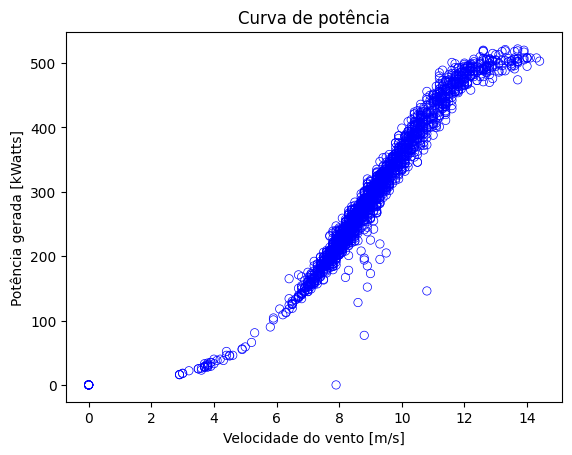

In [64]:
data = np.loadtxt('aerogerador.dat')

v = data[:, 0]
pot = data[:, 1]

# Cria o scatterplot
plt.scatter(v, pot, color='blue', marker='o', facecolors='none', edgecolors='blue', linewidths=0.5)

# Adiciona rótulos e título
plt.xlabel('Velocidade do vento [m/s]')
plt.ylabel('Potência gerada [kWatts]')
plt.title('Curva de potência')

# Exibe o gráfico
plt.show()

In [65]:
def r2(y, erro):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - SEQ/Syy

In [66]:
def r2_ajustado(y, erro, n, p):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - (SEQ / Syy) * ((n - 1) / (n - p - 1))

In [67]:
def aic(v, k, erro):
    SEQ = np.sum(erro ** 2)
    return (len(v) * np.log(SEQ)) + 2*k

Best solution: [-0.16200605  2.59664044 -2.89142118  1.92449156  3.75937641 11.87064723]
Best fitness: 70692846849.55623


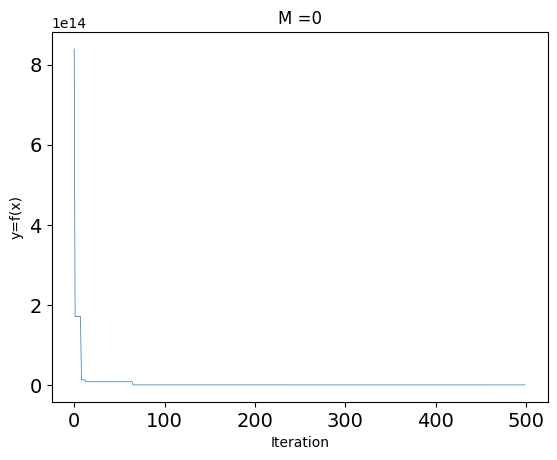

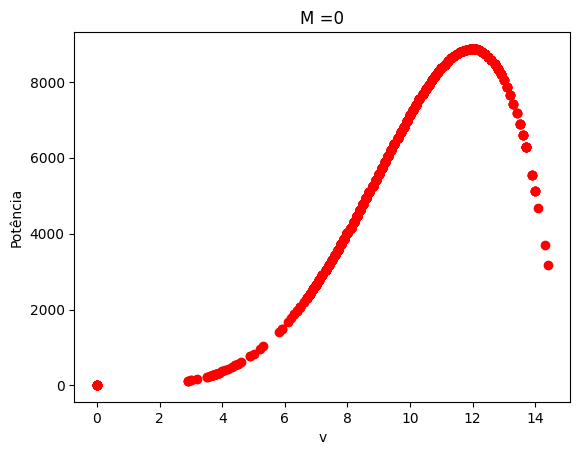

Best solution: [ 0.12409869 -1.93421362  7.17615811 18.10375049  9.79894059 11.62830784]
Best fitness: 19623544145.1925


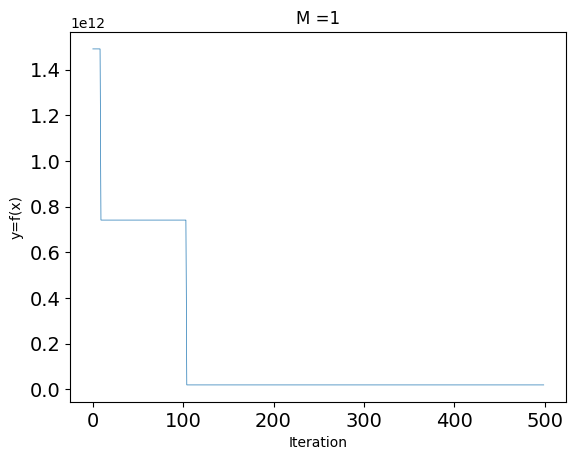

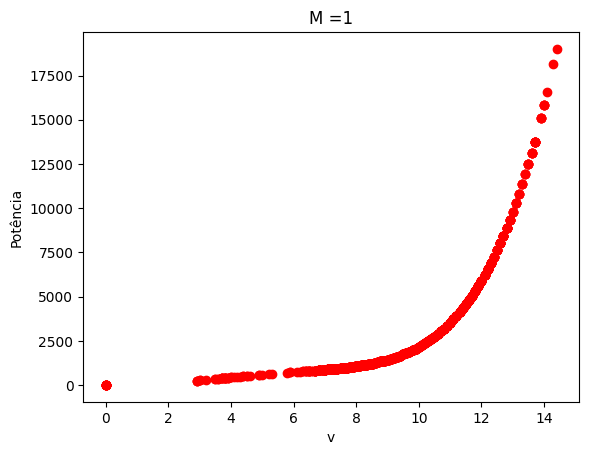

Best solution: [-0.14227541  2.32656233  3.78133419 19.48455927  8.68211166 11.93259071]
Best fitness: 387828798685.3862


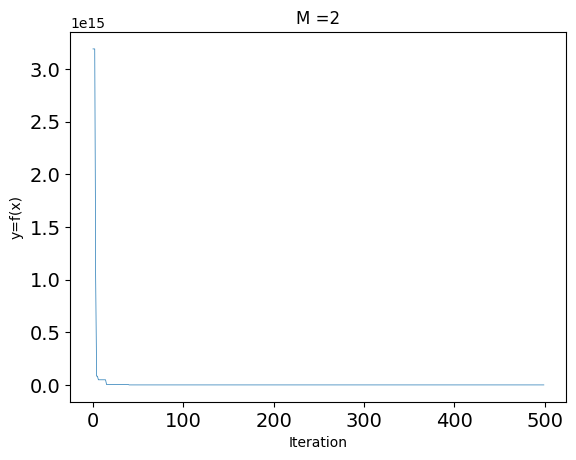

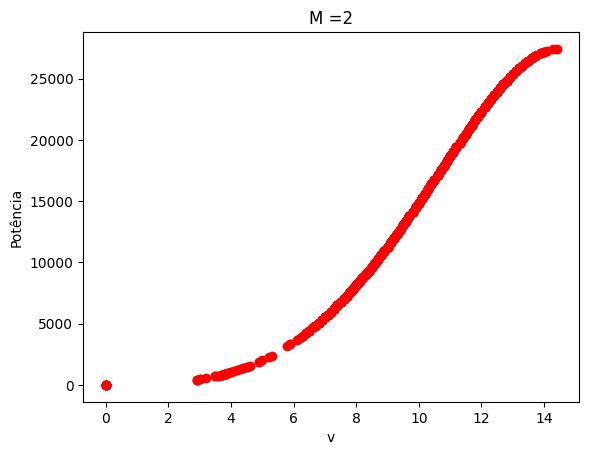

Best solution: [ 0.0158688  -0.55328711  5.96267113 11.13389817 -0.07135288 11.11896604]
Best fitness: 14829192723.476616


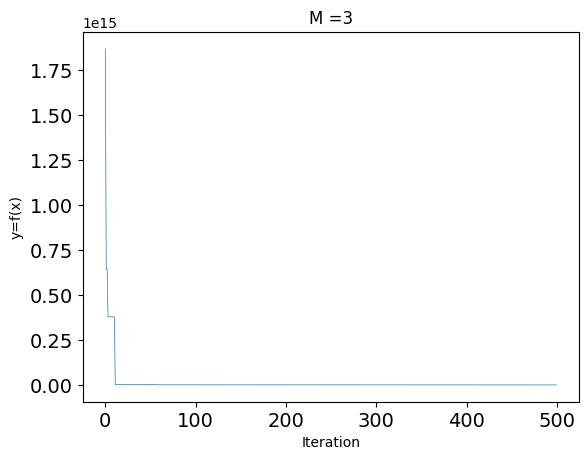

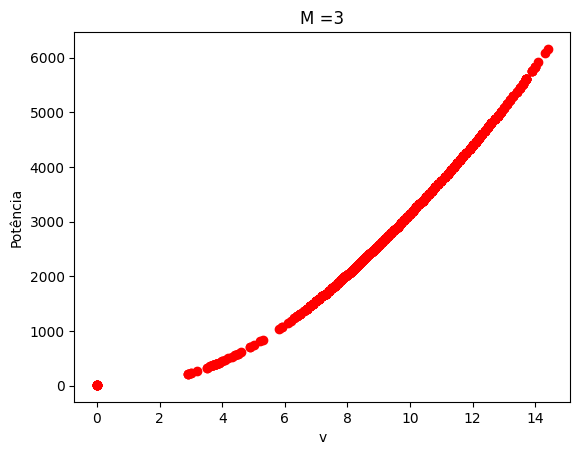

Best solution: [ 0.35499223 -4.6471764   0.73332318 -0.37896121 13.10250288 15.35398401]
Best fitness: 158408546662.88824


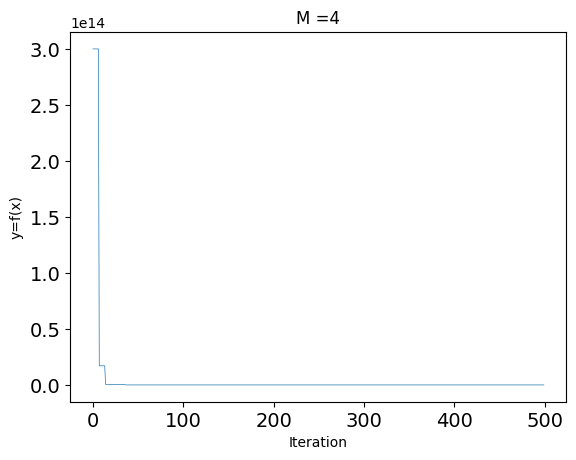

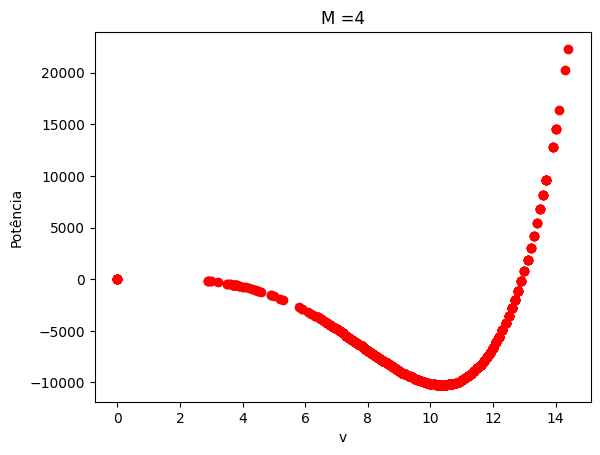

Best solution: [-0.37433472  4.1707251   5.44433599 14.41488299 -2.13565153 16.83586071]
Best fitness: 186561370589.34232


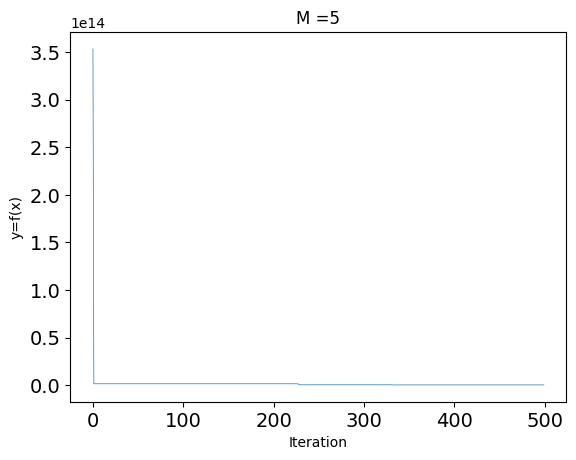

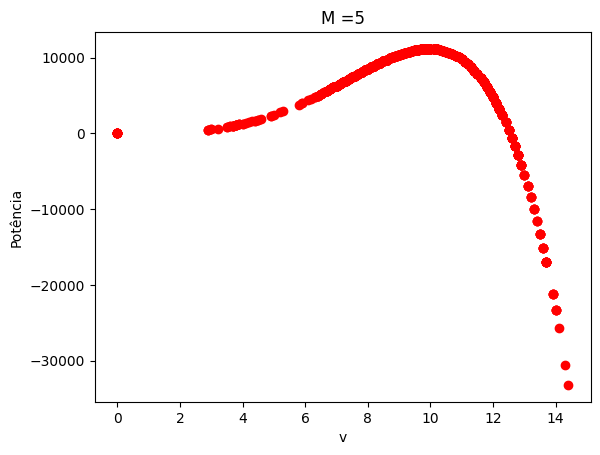

Best solution: [-0.03608026  0.54581851 11.14607615 -4.29121033 14.99202405 14.80612452]
Best fitness: 316119970220.80396


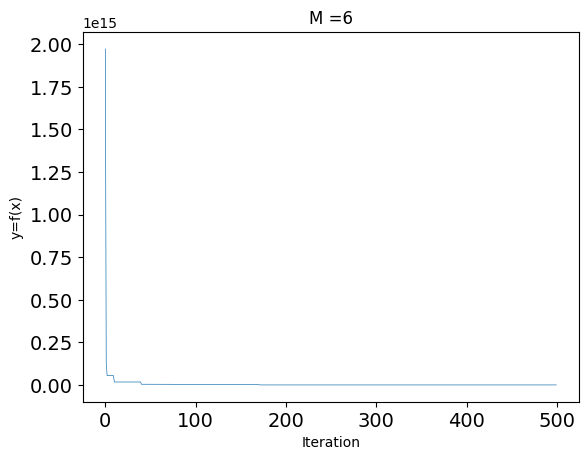

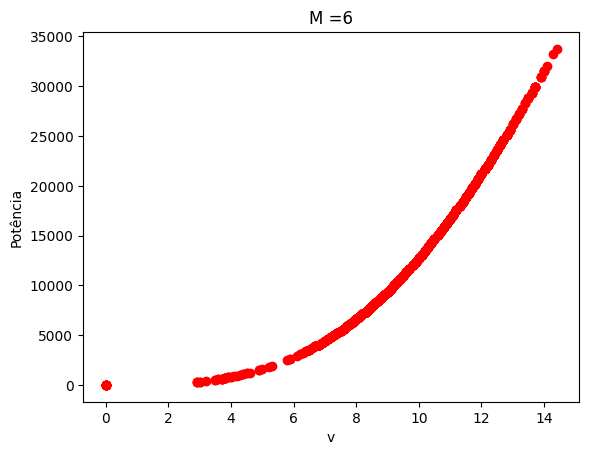

Best solution: [-0.07011776 -1.47182734 13.67622654 -0.62894746  2.22951246 11.81389089]
Best fitness: 346634880774.8662


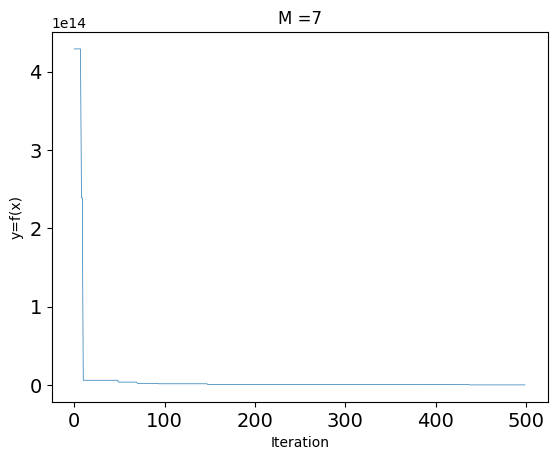

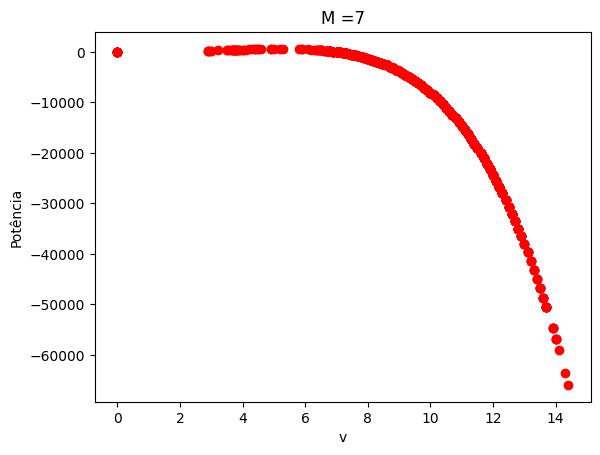

Best solution: [-0.64881856  8.66272336 -2.99745822  0.05432367 -1.38408472 17.65272301]
Best fitness: 485915001348.4159


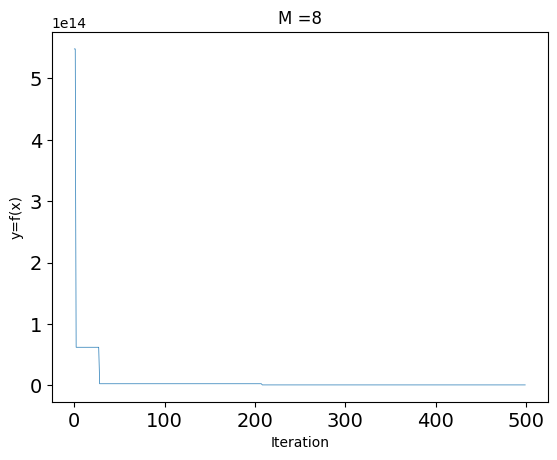

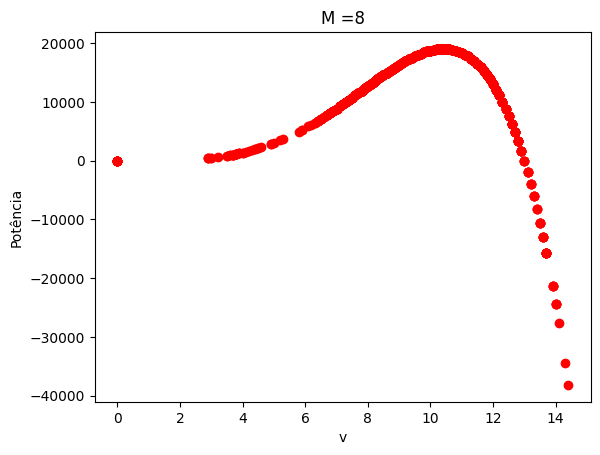

Best solution: [-0.27717807  3.38345251  0.07040954 18.62314638 16.83018278 12.20153192]
Best fitness: 96521890619.12881


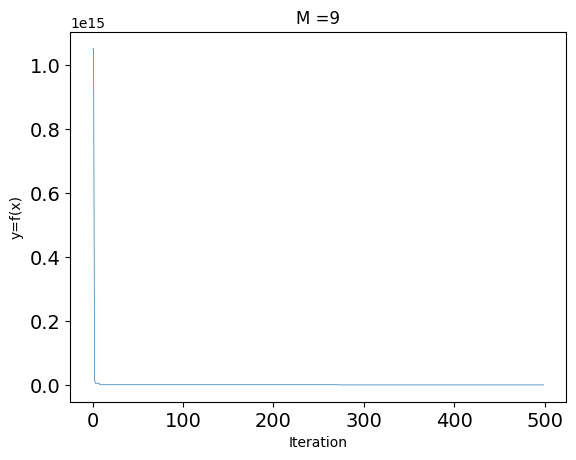

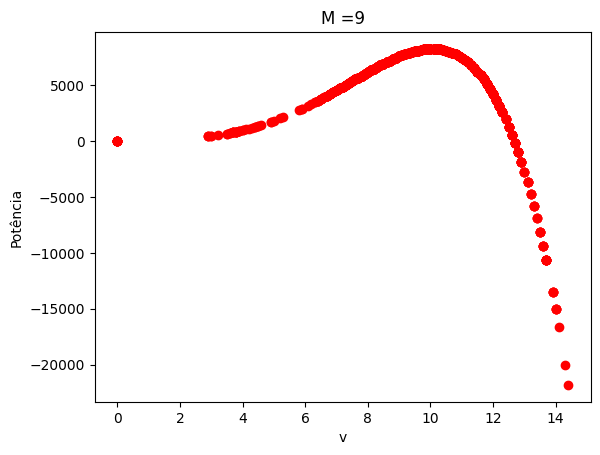

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Parameters
Ng = 500 # Number of iterations
M = 10
limites = [-6, 20]
k = 5
y = pot
data_values = []
coeficientes = []

for m in range(M):
    # Define the variables
    
    
    x_best = np.random.uniform(limites[0], limites[1], size=(k+1,))    
    #B = np.polyfit(v, y, k)
    ypred = np.polyval(x_best, v)
          
    erro = y - ypred
    SEQ = np.sum(erro ** 2)

    Fbest = SEQ
    
    cands = []
    aptidao = []
    for t in range(1, Ng + 1):
        
        x_cand = np.random.uniform(limites[0], limites[1], size=(k+1,))
        cands.append(x_cand)
        #B = polyfit(v, y, k)
        ypred = np.polyval(x_cand, v)
        erro = y - ypred
        
        SEQ = np.sum(erro ** 2)
    
        Fcand = SEQ
        
        if Fcand < Fbest:
            x_best = x_cand
            Fbest = Fcand
    
        aptidao.append(Fbest)
    
    ypred = np.polyval(x_best, v)
    erro = y - ypred
    R2 = r2(y, erro)
    R2_ajustado = r2_ajustado(y, erro, len(y), k + 1)
    AIC = aic(v, k, erro)
    data_values.append((R2, R2_ajustado, AIC, m))
    coeficientes.append((x_best, m))
    
    print("Best solution:", x_best)
    print("Best fitness:", Fbest)
    
    plt.figure()
    plt.plot(aptidao, linewidth=0.5)
    plt.xlabel('Iteration')
    plt.ylabel('y=f(x)')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('M ={}'.format(m))
    
    ypred = np.polyval(x_best, v)
    plt.figure()
    plt.plot(v, ypred, 'ro')
    plt.xlabel('v')
    plt.ylabel('Potência')
    plt.title('M ={}'.format(m))
    
    plt.show()


In [62]:
# Cria o DataFrame com os valores de x, y e t e define os índices como os valores de k
data = pd.DataFrame(data_values, columns=['R2', 'R2_ajustado', 'AIC', 'M'], index=range(1, 11))
data

,R2,R2_ajustado,AIC,M
1,-1343.148903,-1346.744486,54547.112412,0
2,-638.753244,-640.464576,52876.636451,1
3,-1437.000868,-1440.847504,54698.971294,2
4,-16216.178961,-16259.559734,60150.310100,3
5,-14080.314709,-14117.982069,59832.559724,4
6,-1313.645168,-1317.161829,54497.175391,5
7,-26212.072002,-26282.191678,61230.731092,6
8,-496.271678,-497.601874,52309.757876,7
9,-3762.843010,-3772.911249,56863.891256,8
10,-14054.366481,-14091.964429,59828.409730,9


In [69]:
# Cria o DataFrame com os valores de x, y e t e define os índices como os valores de k
coeficientes = pd.DataFrame(coeficientes, columns=['coeficientes', 'K'], index=range(1, 11))
coeficientes

,coeficientes,K
1,"[-0.16200605082857322, 2.5966404352632964, -2....",0
2,"[0.12409869400381268, -1.9342136166283144, 7.1...",1
3,"[-0.14227541098072205, 2.326562334342695, 3.78...",2
4,"[0.015868802687480255, -0.5532871075428902, 5....",3
5,"[0.35499223309795447, -4.647176400090334, 0.73...",4
6,"[-0.37433471722131006, 4.170725102226426, 5.44...",5
7,"[-0.036080258184086667, 0.5458185062295735, 11...",6
8,"[-0.07011776277125215, -1.4718273413418004, 13...",7
9,"[-0.648818562785241, 8.66272336462216, -2.9974...",8
10,"[-0.27717806513112286, 3.383452513109342, 0.07...",9


In [73]:
coeficientes_k0 = coeficientes.loc[coeficientes['K'] == 0]['coeficientes'].values[0]
coeficientes_k0

array([-0.16200605,  2.59664044, -2.89142118,  1.92449156,  3.75937641,
       11.87064723])

In [74]:
coeficientes_k1 = coeficientes.loc[coeficientes['K'] == 1]['coeficientes'].values[0]
coeficientes_k1

array([ 0.12409869, -1.93421362,  7.17615811, 18.10375049,  9.79894059,
       11.62830784])

In [75]:
coeficientes_k3 = coeficientes.loc[coeficientes['K'] == 3]['coeficientes'].values[0]
coeficientes_k3

array([ 0.0158688 , -0.55328711,  5.96267113, 11.13389817, -0.07135288,
       11.11896604])

In [76]:
# Calcule a norma euclidiana
norma = np.linalg.norm(coeficientes_k0)

print("Norma Euclidiana:", norma)

Norma Euclidiana: 13.186278787324321
